# 手写字符识别神经网络
https://aibydoing.com/notebooks/chapter06-03-challenge-handwritten-character-recognition-neural-network

In [1]:
import numpy as np
from sklearn import datasets

digits = datasets.load_digits()

In [19]:
##第一个字符图像对应的数字：
digits.target[0]


0

In [15]:
## 第一个字符图像对应的灰度值矩阵：
digits.images[0]


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [16]:
## 将矩阵扁平化为行向量：
digits.data[0]


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Matplotlib is building the font cache; this may take a moment.


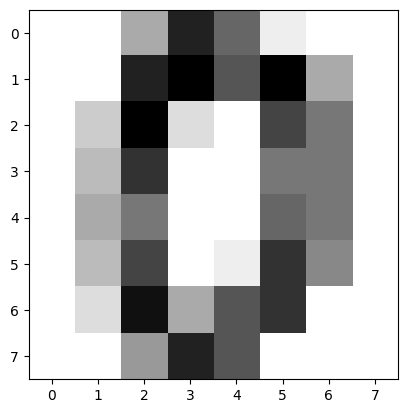

In [2]:

## 根据灰度值矩阵，使用 Matplotlib 把字符对应的灰度图像绘制出来。

from matplotlib import pyplot as plt

%matplotlib inline

image1 = digits.images[0]
plt.imshow(image1, cmap=plt.cm.gray_r)

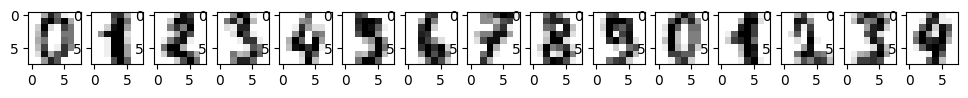

In [13]:
## 使用 1x5 的子图样式绘制 Digits 数据集前 15 个手写字符的图像。
### 代码开始 ### (3～5 行代码)
fig, axes = plt.subplots(1, 15, figsize=(12,4))
for i, image in enumerate(digits.images[:15]):
    axes[i].imshow(image, cmap=plt.cm.gray_r)
### 代码结束 ###

In [7]:
## 使用 train_test_split() 将数据集切分为 80%（训练集） 和 20%（测试集） 两部分。

## 规定：训练集特征，训练集目标，测试集特征，测试集目标分别定义为：X_train, y_train, X_test, y_test，随机数种子定为 30。
### 代码开始 ### (≈ 2 行代码)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=30)
### 代码结束 ###

len(X_train), len(y_train), len(X_test), len(y_test), np.mean(y_test[5:13])

(1437, 1437, 360, 360, 3.75)

# 使用 scikit-learn 搭建人工神经网络

scikit-learn 中的 MLPClassifier() 类实现了具有反向传播算法的多层神经网络结构。


- hidden_layer_sizes: 定义隐含层及包含的神经元数量，(20, 20) 代表 2 个隐含层各有 20 个神经元。
- activation: 激活函数，有 identity（线性）, logistic, tanh, relu 可选。
- solver: 求解方法，有 lbfgs（拟牛顿法），sgd（随机梯度下降），adam（改进型 sgd） 可选。adam 在相对较大的数据集上效果比较好（上千个样本），对小数据集而言，lbfgs 收敛更快效果也很好。 
- alpha: 正则化项参数。
- learning_rate: 学习率调整策略，constant（不变），invscaling（逐步减小），adaptive（自适应） 可选。
- learning_rate_init: 初始学习率，用于随机梯度下降时更新权重。
- max_iter: 最大迭代次数。
- shuffle: 决定每次迭代是否重新打乱样本。
- random_state: 随机数种子。
- tol: 优化求解的容忍度，当两次迭代损失差值小于该容忍度时，模型认为达到收敛并且训练停止。

挑战：使用 `MLPClassifier()` 搭建神经网络结构，并训练手写字符识别模型，最后得到在测试集上的预测准确率。

规定：

神经网络结构包含 2 个隐含层，依次有 100 和 50 个神经元。

使用 relu 作为激活函数。

使用随机梯度下降 SGD 方法求解。

学习率为 0.02 且在学习过程中保持不变。

最大迭代次数为 100 次。

随机数种子设为 1。

其余参数使用默认值。

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

def mpl():
    """
    参数:无

    返回:
    model -- 人工神经网络模型
    score -- 测试集上的预测准确率
    """
    ### 代码开始 ### (≈ 2 行代码)
    model = MLPClassifier(
        hidden_layer_sizes=(100, 50),
        activation='relu',
        solver='sgd',
        learning_rate_init=0.02,
        learning_rate='constant',
        max_iter=100,
        random_state=1
    )

    model.fit(X_train, y_train)
    score = accuracy_score(y_test, model.predict(X_test))
    ### 代码结束 ###
    return model, score


# 预测准确率
mpl()[1]




0.9777777777777777

61

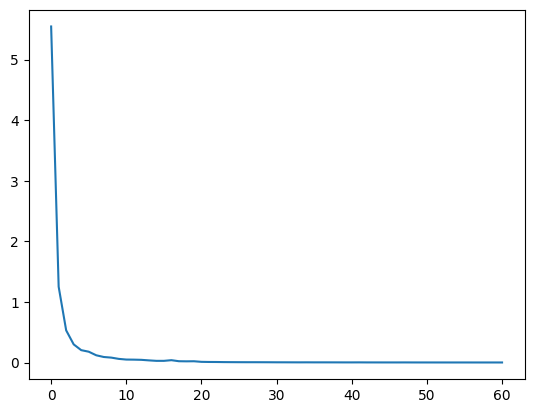

In [11]:
# 绘制损失变化曲线
model = mpl()[0]
plt.plot(model.loss_curve_)

# 输出模型达到收敛的迭代次数
model.n_iter_